In [1]:
import pandas as pd
import numpy as np 
import sklearn 
import mglearn

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                    stratify=cancer.target, random_state=16)

In [9]:
tree = DecisionTreeClassifier(random_state=26)
tree.fit(X_train, y_train)
print('training set score: {}'.format(tree.score(X_train, y_train)))
print('testing set score: {}'.format(tree.score(X_test, y_test)))

training set score: 1.0
testing set score: 0.9020979020979021


100% accuracy from training set suggests total memeroization of the data, thus overfitting 

In [15]:
# check the model tree depth
tree.tree_.max_depth

5

In [10]:
# limit overfitting by reduce the tree depth 
tree2 = DecisionTreeClassifier(max_depth=4, random_state=36)
tree2.fit(X_train, y_train)
print('training set score: {}'.format(tree2.score(X_train, y_train)))
print('testing set score: {}'.format(tree2.score(X_test, y_test)))

training set score: 0.9882629107981221
testing set score: 0.916083916083916


In [19]:
# visualize the tree
from sklearn.tree import export_graphviz
export_graphviz(tree2, out_file='tree.dot', class_names=cancer.target_names,
               feature_names = cancer.feature_names, impurity=False, filled=True)

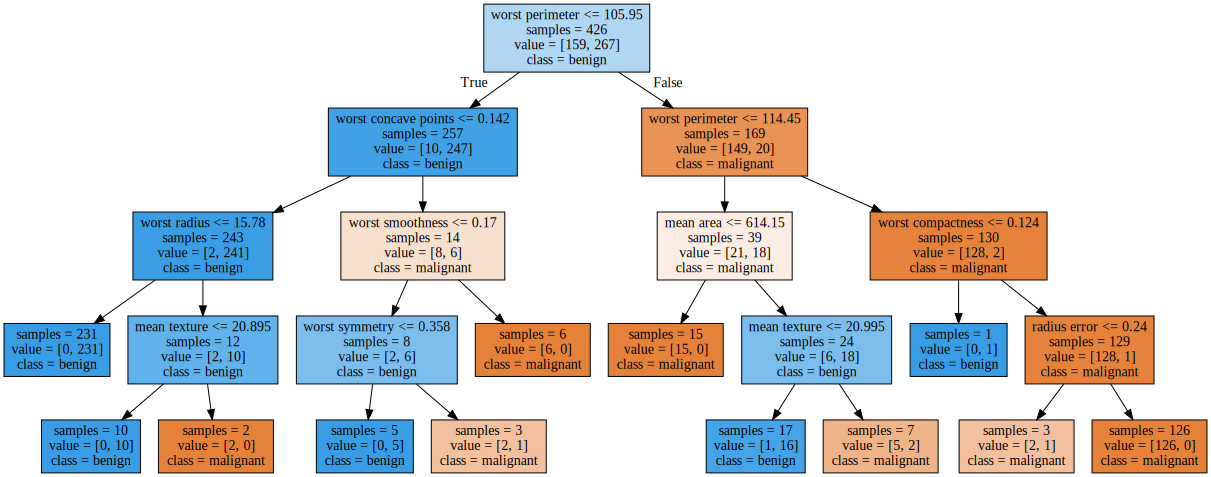

In [68]:
import graphviz
with open('tree.dot') as f:
    tree_graph = f.read()
display(graphviz.Source(tree_graph))

In [24]:
# check feature importance 
print(tree2.feature_importances_)

[0.         0.03957109 0.         0.05411368 0.         0.
 0.         0.         0.         0.         0.00339317 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00330241 0.         0.81689407 0.
 0.02009937 0.01018201 0.         0.04375929 0.00868491 0.        ]


In [49]:
feature_imp = pd.DataFrame([cancer.feature_names, tree2.feature_importances_])
feature_imp = feature_imp.transpose()
feature_imp.columns = ['feature_names', 'feature_importances']
feature_imp

,feature_names,feature_importances
0,mean radius,0
1,mean texture,0.0395711
2,mean perimeter,0
3,mean area,0.0541137
4,mean smoothness,0
5,mean compactness,0
6,mean concavity,0
7,mean concave points,0
8,mean symmetry,0
9,mean fractal dimension,0


(-1, 30)

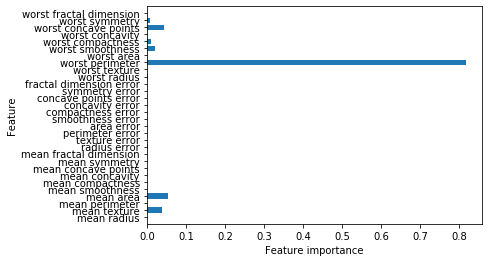

In [62]:
import matplotlib.pyplot as plt
n_features = cancer.data.shape[1]
plt.barh(range(n_features), feature_imp.feature_importances, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.ylim(-1, n_features)